In [70]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
# Load the data
df = pd.read_csv('data/0401_UkraineCombinedTweetsDeduped.csv', 
        usecols=['text', 
                'location', 
                'language', 
                'tweetcreatedts', 
                'hashtags'])

# Show full length of the text
pd.set_option('display.max_colwidth', None)

# View the data
df.head()

,location,tweetcreatedts,text,hashtags,language
0,Hawaii,2022-04-01 00:00:00.000000,⚡The Ukrainian Air Force would like to address...,[],en
1,NaN,2022-04-01 00:00:00.000000,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en
2,NaN,2022-04-01 00:00:00.000000,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en
3,International Web Zone,2022-04-01 00:00:00.000000,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en
4,Hunter Account,2022-04-01 00:00:00.000000,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en


In [14]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364875 entries, 0 to 364874
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   location        212933 non-null  object
 1   tweetcreatedts  364875 non-null  object
 2   text            364875 non-null  object
 3   hashtags        364875 non-null  object
 4   language        364875 non-null  object
dtypes: object(5)
memory usage: 13.9+ MB


In [15]:
# Duplicates

df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [16]:
# NUll values

df.isnull().sum()

location          151120
tweetcreatedts         0
text                   0
hashtags               0
language               0
dtype: int64

In [17]:
# Replace Null values

df.replace(np.nan, 'Unknown', inplace=True)

df.isnull().sum()

location          0
tweetcreatedts    0
text              0
hashtags          0
language          0
dtype: int64

In [44]:
print(f"There are {df['location'].nunique()} unique locations in this DataFrame.")
df['location'].unique()

There are 42667 unique locations in this DataFrame.


<AxesSubplot:title={'center':'Top 30 Locations bu frequency'}, xlabel='Location', ylabel='Number of Tweets'>

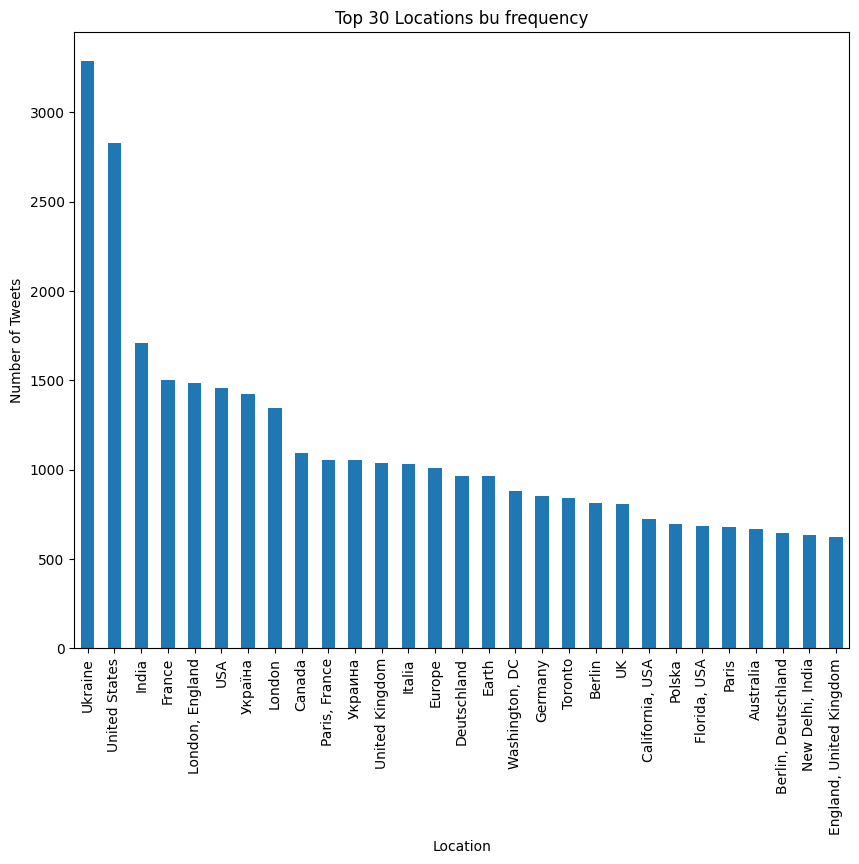

In [42]:
df.groupby("location").size().sort_values(ascending=False)[1:30].plot.bar(
    figsize=(10, 8),
    title="Top 30 Locations bu frequency",
    xlabel="Location",
    ylabel="Number of Tweets")

In [47]:
print(f"There are {df['language'].nunique()} unique languages in this DataFrame.")
df['language'].unique()

There are 61 unique languages in this DataFrame.


array(['en', 'ar', 'es', 'tr', 'fr', 'no', 'uk', 'hi', 'de', 'und', 'it',
       'zh', 'in', 'pt', 'ja', 'nl', 'th', 'cs', 'bn', 'ur', 'pl', 'sv',
       'eu', 'ru', 'sl', 'et', 'el', 'ro', 'ht', 'fa', 'da', 'or', 'lt',
       'iw', 'gu', 'tl', 'bg', 'fi', 'lv', 'ko', 'ca', 'cy', 'ta', 'te',
       'hu', 'mr', 'sr', 'am', 'ne', 'ml', 'vi', 'is', 'kn', 'ka', 'pa',
       'my', 'ckb', 'hy', 'si', 'ps', 'dv'], dtype=object)

In [58]:
print(f"{round(df.loc[df['language'] == 'en'].shape[0]/df.shape[0]*100, 2)}% of the tweets are in English.")

69.74% of the tweets are in English.


In [59]:
# Remove non english tweets
df = df[~(df['language'] != 'en')]

# Reset index
df.reset_index(drop=True, inplace=True)


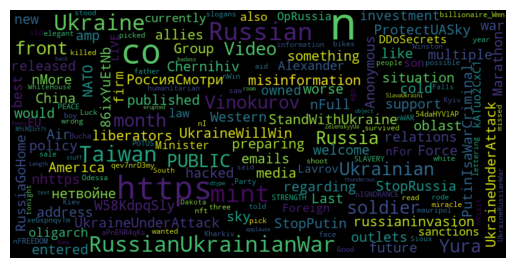

In [95]:
STOPWORDS = stopwords.words('english')
wc = WordCloud(width=800,
               height=400,
               stopwords=STOPWORDS,
               max_words=400,
               max_font_size=72,
               random_state=42
               ).generate(str(df['text']))

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')